In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output


In [3]:
cd ..

/Users/hasegawatakashikana


In [4]:
cd Downloads/house-prices-advanced-regression-techniques/

/Users/hasegawatakashikana/Downloads/house-prices-advanced-regression-techniques


In [110]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [6]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH       80.000    11622   Pave   NaN      Reg   
1  1462          20       RL       81.000    14267   Pave   NaN      IR1   
2  1463          60       RL       74.000    13830   Pave   NaN      IR1   
3  1464          60       RL       78.000     9978   Pave   NaN      IR1   
4  1465         120       RL       43.000     5005   Pave   NaN      IR1   

  LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub      ...               120        0    NaN  MnPrv   
1         Lvl    AllPub      ...                 0        0    NaN    NaN   
2         Lvl    AllPub      ...                 0        0    NaN  MnPrv   
3         Lvl    AllPub      ...                 0        0    NaN    NaN   
4         HLS    AllPub      ...               144        0    NaN    NaN   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0      6    2010        WD         Normal  
1        Gar2   12500      6    2010        WD         Normal  
2         NaN       0      3    2010        WD         Normal  
3         NaN       0      6    2010        WD         Normal  
4         NaN       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [8]:
train.shape

(1460, 81)

In [9]:
test.shape

(1459, 80)

In [10]:
train_ID = train["Id"]
test_ID = test["Id"]
#inplaceがTrueだと元のDataframeが変更される
train.drop("Id",axis=1,inplace=True)
test.drop("Id",axis=1,inplace=True)

In [11]:
train.shape

(1460, 80)

In [12]:
test.shape

(1459, 79)

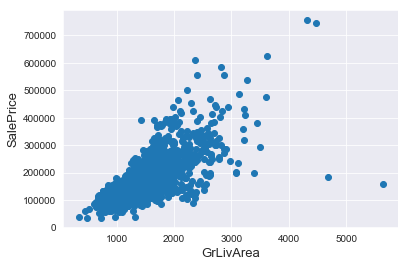

In [13]:
fig, ax = plt.subplots()
ax.scatter(x=train["GrLivArea"],y=train["SalePrice"])
plt.ylabel("SalePrice",fontsize=13)
plt.xlabel("GrLivArea",fontsize=13)
plt.show()

In [15]:
train[(train["GrLivArea"]>4000)&(train["SalePrice"]<300000)]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
523           60       RL      130.000    40094   Pave   NaN      IR1   
1298          60       RL      313.000    63887   Pave   NaN      IR3   

     LandContour Utilities LotConfig    ...     PoolArea PoolQC Fence  \
523          Bnk    AllPub    Inside    ...            0    NaN   NaN   
1298         Bnk    AllPub    Corner    ...          480     Gd   NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
523          NaN       0     10    2007       New        Partial     184750  
1298         NaN       0      1    2008       New        Partial     160000  

[2 rows x 80 columns]

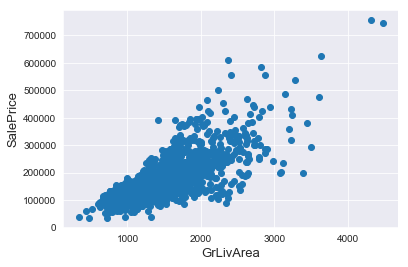

In [16]:
#Deleting outliers
train = train.drop(train[(train["GrLivArea"]>4000)&(train["SalePrice"]<300000)].index)

#Check the graphic again
fig,ax = plt.subplots()
ax.scatter(train["GrLivArea"],y=train["SalePrice"])
plt.ylabel("SalePrice",fontsize=13)
plt.xlabel("GrLivArea",fontsize=13)
plt.show()

/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu=180932.92 and sigma = 79467.79



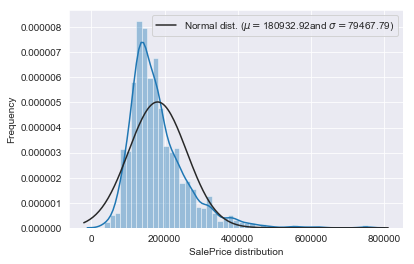

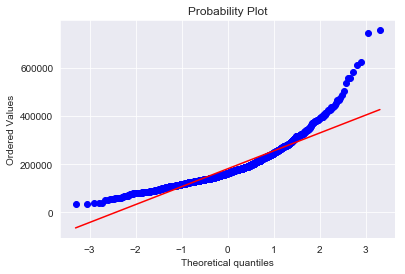

In [19]:
sns.distplot(train["SalePrice"],fit=norm)

#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train["SalePrice"])
print("\n mu={:.2f} and sigma = {:.2f}\n".format(mu,sigma))

#plot the distribution
plt.legend(["Normal dist. ($\mu=${:.2f}and $\sigma=${:.2f})".format(mu,sigma)],loc="best")
plt.ylabel("Frequency")
plt.xlabel("SalePrice distribution")

fig = plt.figure()
res = stats.probplot(train["SalePrice"],plot=plt)
plt.show()

/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 12.02and sigma =0.40



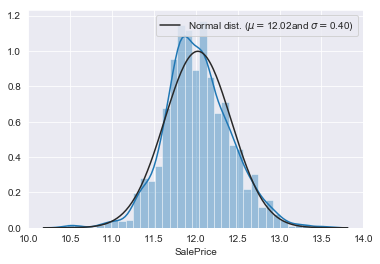

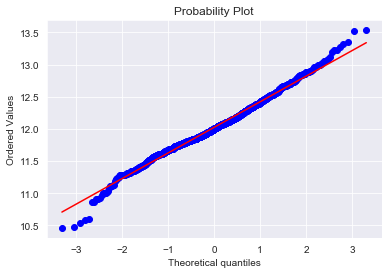

In [20]:
train["SalePrice"] = np.log1p(train["SalePrice"])

sns.distplot(train["SalePrice"],fit=norm)

(mu,sigma)= norm.fit(train["SalePrice"])
print("\n mu = {:.2f}and sigma ={:.2f}\n".format(mu,sigma))

plt.legend(["Normal dist. ($\mu=${:.2f}and $\sigma=${:.2f})".format(mu,sigma)],loc="best")
fig = plt.figure()
res = stats.probplot(train["SalePrice"],plot=plt)
plt.show()

In [21]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train,test)).reset_index(drop=True)
all_data.drop(["SalePrice"],axis=1,inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


In [22]:
ntest

1459

In [28]:
all_data_na = (all_data.isnull().sum()/len(all_data))*100
print(all_data_na.head())
all_data_na = all_data_na.drop(all_data_na[ all_data_na== 0].index).sort_values(ascending=False)[:30]
print(all_data_na.head())
sing_data = pd.DataFrame({"Missing Ratio" :all_data_na})
sing_data.head(30)

1stFlrSF        0.000
2ndFlrSF        0.000
3SsnPorch       0.000
Alley          93.212
BedroomAbvGr    0.000
dtype: float64
PoolQC        99.691
MiscFeature   96.400
Alley         93.212
Fence         80.425
FireplaceQu   48.680
dtype: float64


Missing Ratio
PoolQC               99.691
MiscFeature          96.400
Alley                93.212
Fence                80.425
FireplaceQu          48.680
LotFrontage          16.661
GarageQual            5.451
GarageCond            5.451
GarageFinish          5.451
GarageYrBlt           5.451
GarageType            5.382
BsmtExposure          2.811
BsmtCond              2.811
BsmtQual              2.777
BsmtFinType2          2.743
BsmtFinType1          2.708
MasVnrType            0.823
MasVnrArea            0.788
MSZoning              0.137
BsmtFullBath          0.069
BsmtHalfBath          0.069
Utilities             0.069
Functional            0.069
Electrical            0.034
BsmtUnfSF             0.034
Exterior1st           0.034
Exterior2nd           0.034
TotalBsmtSF           0.034
GarageArea            0.034
GarageCars            0.034

Text(0.5, 1.0, 'Percent missing data by feature')

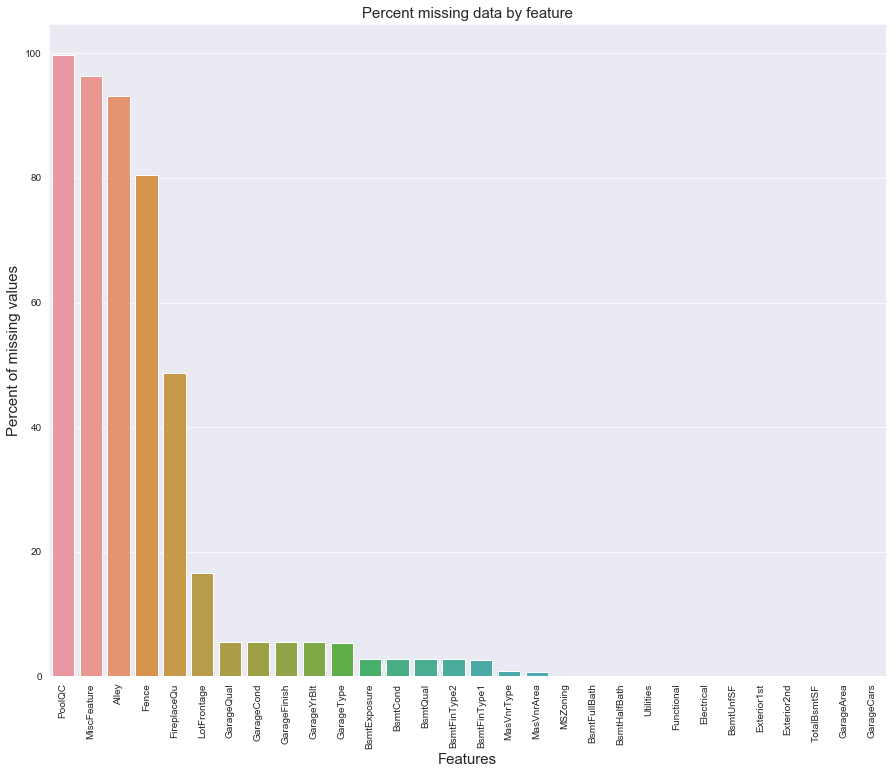

In [25]:
fig,ax = plt.subplots(figsize=(15,12))
plt.xticks(rotation="90")
sns.barplot(x=all_data_na.index,y=all_data_na)
plt.xlabel("Features",fontsize=15)
plt.ylabel("Percent of missing values",fontsize=15)
plt.title("Percent missing data by feature",fontsize=15)

データの相関

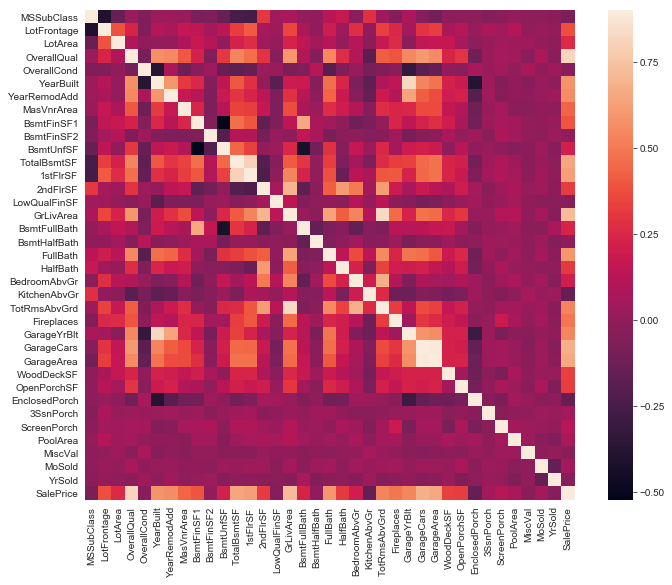

In [26]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.9,square=True)

欠損値の入力

In [27]:
all_data.head()

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
0       856       854          0   NaN             3     1Fam       TA   
1      1262         0          0   NaN             3     1Fam       TA   
2       920       866          0   NaN             3     1Fam       TA   
3       961       756          0   NaN             3     1Fam       Gd   
4      1145      1053          0   NaN             4     1Fam       TA   

  BsmtExposure  BsmtFinSF1  BsmtFinSF2  ...   SaleType ScreenPorch  Street  \
0           No     706.000       0.000  ...         WD           0    Pave   
1           Gd     978.000       0.000  ...         WD           0    Pave   
2           Mn     486.000       0.000  ...         WD           0    Pave   
3           No     216.000       0.000  ...         WD           0    Pave   
4           Av     655.000       0.000  ...         WD           0    Pave   

   TotRmsAbvGrd TotalBsmtSF  Utilities WoodDeckSF YearBuilt YearRemodAdd  \
0             8     856.000     AllPub          0      2003         2003   
1             6    1262.000     AllPub        298      1976         1976   
2             6     920.000     AllPub          0      2001         2002   
3             7     756.000     AllPub          0      1915         1970   
4             9    1145.000     AllPub        192      2000         2000   

  YrSold  
0   2008  
1   2007  
2   2008  
3   2006  
4   2008  

[5 rows x 79 columns]

In [39]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"]=all_data["MiscFeature"].fillna("None")
all_data["Alley"]=all_data["Alley"].fillna("None")
all_data["Fence"]=all_data["Fence"].fillna("None")
all_data["FireplaceQu"]=all_data["FireplaceQu"].fillna("None")

all_data["LotFrontage"]= all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

for col in ("GarageYrBlt","GarageArea","GarageCars"):
    all_data[col]=all_data[col].fillna(0)
    
for col in ("BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath"):
    all_data[col]=all_data[col].fillna(0)
    
for col in ("BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"):
    all_data[col]=all_data[col].fillna("None")
    
all_data["MasVnrType"]=all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"]=all_data["MasVnrArea"].fillna(0)

all_data["MSZoning"] = all_data["MSZoning"].fillna(all_data["MSZoning"].mode()[0])

# all_data= all_data.drop(["Utilities"],axis=1)

all_data["Functional"] = all_data["Functional"].fillna("Typ")

all_data["Electrical"]=all_data["Electrical"].fillna(all_data["Electrical"].mode()[0])

all_data["KitchenQual"]=all_data["KitchenQual"].fillna(all_data["KitchenQual"].mode()[0])

all_data["Exterior1st"] = all_data["Exterior1st"].fillna(all_data["Exterior1st"].mode()[0])

all_data["Exterior2nd"] = all_data["Exterior2nd"].fillna(all_data["Exterior2nd"].mode()[0])

all_data["SaleType"]=all_data["SaleType"].fillna(all_data["SaleType"].mode()[0])

all_data["MSSubClass"]=all_data["MSSubClass"].fillna("None")

all_data["GarageFinish"]=all_data["GarageFinish"].fillna("None")
all_data["GarageQual"]=all_data["GarageFinish"].fillna("None")
all_data["GarageType"]=all_data["GarageType"].fillna("None")
all_data["GarageCond"]=all_data["GarageCond"].fillna("None")

In [40]:
all_data_na = (all_data.isnull().sum()/len(all_data))*100

all_data_na = all_data_na.drop(all_data_na[ all_data_na== 0].index).sort_values(ascending=False)[:30]

sing_data = pd.DataFrame({"Missing Ratio" :all_data_na})
sing_data.head()

Empty DataFrame
Columns: [Missing Ratio]
Index: []

型の変換

In [42]:
all_data["MSSubClass"]= all_data["MSSubClass"].astype(str)

all_data["OverallCond"]=all_data["OverallCond"].astype(str)

In [43]:
all_data["YrSold"] = all_data["YrSold"].astype(str)
all_data["MoSold"]=all_data["MoSold"].astype(str)

Label Encoding

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
cols  = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols :
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c]=lbl.transform(list(all_data[c].values))
    
print("Shape all_data:{}".format(all_data.shape))

Shape all_data:(2917, 78)


特徴量を１つ追加

In [46]:
all_data["TotalSF"] = all_data["TotalBsmtSF"] + all_data["1stFlrSF"] + all_data["2ndFlrSF"]

Skewed features

In [47]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x :skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({"Skew" :skewed_feats})
skewness.head(10)



Skew in numerical features: 



Skew
MiscVal       21.940
PoolArea      17.689
LotArea       13.109
LowQualFinSF  12.085
3SsnPorch     11.372
LandSlope      4.973
KitchenAbvGr   4.301
BsmtFinSF2     4.145
EnclosedPorch  4.002
ScreenPorch    3.945

Box Cox Skewed featuresの変換

In [50]:
skewness = skewness[abs(skewness)>0.75]
print("There are {} skewed numerical features to BoxCox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat]=boxcox1p(all_data[feat],lam)
    

There are 59 skewed numerical features to BoxCox transform


ダミー変数の取得

In [51]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [52]:
#新しいトレーニングデータとテストデータの用意をする
train = all_data[:ntrain]
test = all_data[ntrain:]

In [55]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [103]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

Base models and scores

lasso regression

In [95]:
lasso = make_pipeline(RobustScaler(),Lasso(alpha=0.0005,random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score : {:.4f}({:.4f})\n".format(score.mean(),score.std()))


Lasso score : 0.1123(0.0079)



In [96]:
ENet = make_pipeline(RobustScaler(),ElasticNet(alpha=0.0005,l1_ratio=.9,random_state=3))
score = rmsle_cv(ENet)
print("\nElasticNet score : {:.4f}({:.4f})\n".format(score.mean(),score.std()))


ElasticNet score : 0.1123(0.0080)



In [99]:
KRR = KernelRidge(alpha=0.6,kernel="polynomial",degree=2,coef0=2.5)
score = rmsle_cv(KRR)
print("\nKernel Ridge score : {:.4f}({:.4f})\n".format(score.mean(),score.std()))


Kernel Ridge score : 0.1155(0.0075)



In [104]:
GBoost = GradientBoostingRegressor(n_estimators=3000,learning_rate=0.05,max_depth=4,max_features="sqrt",
                                  min_samples_leaf=15,min_samples_split=10,loss="huber",random_state=5)
score = rmsle_cv(GBoost)
print("\nGradientBoost score : {:.4f}({:.4f})\n".format(score.mean(),score.std()))


GradientBoost score : 0.1165(0.0093)



In [71]:
model_xgb = xgb.XGBRegressor(colsample_bylevel=0.4603,gamma=0.0468,
                            learning_rate=0.05,max_depth=3,
                            min_child_weight=1.7817,n_estimators=2200,
                            reg_alpha=0.4640,reg_lambda=0.8571,
                            subsample=0.5213,silent=1,
                            random_state=7,nthread=-1)
score = rmsle_cv(model_xgb)
print("\nXgboost score : {:.4f}({:.4f})\n".format(score.mean(),score.std()))


Xgboost score : 0.1164(0.0053)



In [72]:
model_lgb = lgb.LGBMRegressor(objective="regression",num_leaves=5,learning_rate=0.05,n_estimators=720,
                             max_bin=55,bagging_fraction=0.8,
                             baggin_freq=5,feature_fraction=0.2319,
                             feature_fraction_seed=9,bagging_seed=9,
                             min_data_in_leaf=6,min_sum_hessian_in_leaf=11)
score=rmsle_cv(model_lgb)
print("\nLGBM score : {:.4f}({:.4f})\n".format(score.mean(),score.std()))


LGBM score : 0.1162(0.0069)



平均化されたベースモデルクラス

In [73]:
class AverageingModels(BaseEstimator,RegressorMixin,TransformerMixin):
    def __init__(self,models):
        self.models = models
        
    def fit(self,X,y):
        self.models_=[clone(x) for x in self.models]
        
        #Train cloned base models
        for model in self.models_:
            model.fit(X,y)
        
        return self
    
    def predict(self,X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_])
        return np.mean(predictions,axis=1)

In [75]:
averaged_models = AverageingModels(models=(ENet,GBoost,KRR,lasso))
score = rmsle_cv(averaged_models)
print(("\nAveraged base models score : {:.4f}({:.4f})\n".format(score.mean(),score.std())))


Averaged base models score : 0.1089(0.0078)



In [76]:
class StackingAverageModels(BaseEstimator,RegressorMixin,TransformerMixin):
    def __init__(self,base_models,meta_model,n_folds=5):
        self.base_models=base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
        
    #もう一度オリジナルのクローンにデータをFITさせる
    def fit(self,X,y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds,shuffle=True,random_state=156)
        
        out_of_fold_predictions = np.zeros((X.shape[0],len(self.base_models)))
        for i,model in enumerate(self.base_models):
            for train_index,holdout_index in kfold.split(X,y):
                instance=clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index],y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index,i]=y_pred
                
        self.meta_model_.fit(out_of_fold_predictions,y)
        return self
    
    def predict(self,X):
        meta_features= np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_])
        return self.meta_model_.predict(meta_features)

In [105]:
stacked_averaged_models = StackingAverageModels(base_models=(ENet,GBoost,KRR),meta_model=lasso)
score = rmsle_cv(stacked_averaged_models)
print(("\nStacking Averaged models score : {:.4f}({:.4f})\n".format(score.mean(),score.std())))


Stacking Averaged models score : 0.1089(0.0087)



In [78]:
def rmsle(y,y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))

In [80]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train,stacked_train_pred))

0.07834114480910961


In [81]:
model_xgb.fit(train,y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train,stacked_train_pred))

0.07834114480910961


In [83]:
model_lgb.fit(train,y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train,lgb_train_pred))

0.07372524793182869


In [89]:
ensemble = stacked_pred*0.70+xgb_pred*0.15+lgb_pred*0.15

In [91]:
sub = pd.DataFrame()
sub["Id"]=test_ID
sub["SalePrice"]=ensemble
sub.to_csv("submission.csv",index=False)

In [108]:
import pandas_profiling as pdb

In [107]:
!pip install pandas-profiling

     |████████████████████████████████| 133kB 1.1MB/s eta 0:00:01
     |████████████████████████████████| 614kB 597kB/s eta 0:00:01
     |████████████████████████████████| 225kB 523kB/s eta 0:00:01


  Stored in directory: /Users/hasegawatakashikana/Library/Caches/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Stored in directory: /Users/hasegawatakashikana/Library/Caches/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Stored in directory: /Users/hasegawatakashikana/Library/Caches/pip/wheels/b0/b2/96/2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
Successfully built pandas-profiling htmlmin confuse
  Found existing installation: pluggy 0.7.1
    Uninstalling pluggy-0.7.1:
      Successfully uninstalled pluggy-0.7.1
  Found existing installation: pytest 3.8.1
    Uninstalling pytest-3.8.1:
      Successfully uninstalled pytest-3.8.1
You should consider upgrading via the 'pip install --upgrade pip' command.


In [111]:
pdb.ProfileReport(train)